# 1. Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from scipy.optimize import minimize
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import warnings
warnings.simplefilter("ignore")

In [2]:
%cd "C:\Users\22967\Documents\Competitions_files\Amdari\Dynamic pricing model"

C:\Users\22967\Documents\Competitions_files\Amdari\Dynamic pricing model


# 2. Undestanding the dataset

In [3]:
data = pd.read_csv(r"data\raw\Dataset.csv", decimal=".")
display(data.head(), data.shape)

,Product_ID,Timestamp,Demand,Competitor_Prices,Inventory_Levels,Cost_Prices,Selling_Prices,Product_Categories,Product_Conditions,Product_Ratings,...,Customer_Ages,Customer_Genders,Competitor_Strategies,Marketing_Campaigns,Website_Traffic,Conversion_Rates,Lead_Times,Supplier_Terms,Product_Age,New_Product_Releases
0,1005,2022-07-11,239,1331,646,1040.04,1045.04,Electronics,New,5.0,...,24.0,Female,Price Matching,Email Campaign,8064.0,0.10064,1,Net 30,11,No
1,1530,2021-02-23,290,1441,1141,1186.49,1192.49,Clothing,New,4.0,...,44.0,Male,Bundle Offers,TV Ads,8092.0,0.10092,5,Net 30,10,No
2,1531,2022-09-23,533,1704,861,1408.42,1426.42,Clothing,New,4.0,...,18.0,Female,Discounts,Email Campaign,8180.0,0.10180,6,Net 30,8,No
3,1531,2022-06-21,228,1593,854,1338.38,1350.38,Clothing,Used,4.0,...,27.0,Female,Price Matching,Email Campaign,8040.0,0.10040,9,Net 30,8,No
4,1000,2021-12-23,361,1533,649,1250.09,1262.09,Electronics,New,3.0,...,36.0,Female,Discounts,Social Media Ads,8208.0,0.10208,4,Net 30,10,No


(109768, 23)

# 3. Data processing

In [4]:
display(data.columns.to_list())

['Product_ID',
 'Timestamp',
 'Demand',
 'Competitor_Prices',
 'Inventory_Levels',
 'Cost_Prices',
 'Selling_Prices',
 'Product_Categories',
 'Product_Conditions',
 'Product_Ratings',
 'Number_Of_Reviews',
 'Days_Since_Product_Listing',
 'Customer_Locations',
 'Customer_Ages',
 'Customer_Genders',
 'Competitor_Strategies',
 'Marketing_Campaigns',
 'Website_Traffic',
 'Conversion_Rates',
 'Lead_Times',
 'Supplier_Terms',
 'Product_Age',
 'New_Product_Releases']

'Product_ID', 'Timestamp', 'Demand', 'Competitor_Prices', 'Inventory_Levels', 'Cost_Prices',
 'Selling_Prices', 'Product_Categories', 'Product_Conditions', 'Product_Ratings', 'Number_Of_Reviews',
 'Days_Since_Product_Listing', 'Customer_Locations', 'Customer_Ages', 'Customer_Genders', 'Competitor_Strategies',
 'Marketing_Campaigns', 'Website_Traffic', 'Conversion_Rates', 'Lead_Times', 'Supplier_Terms', 'Product_Age', 'New_Product_Releases'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109768 entries, 0 to 109767
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  109768 non-null  int64  
 1   Timestamp                   109768 non-null  object 
 2   Demand                      109768 non-null  int64  
 3   Competitor_Prices           109768 non-null  int64  
 4   Inventory_Levels            109768 non-null  int64  
 5   Cost_Prices                 109768 non-null  float64
 6   Selling_Prices              109768 non-null  float64
 7   Product_Categories          109768 non-null  object 
 8   Product_Conditions          109768 non-null  object 
 9   Product_Ratings             109768 non-null  float64
 10  Number_Of_Reviews           109768 non-null  int64  
 11  Days_Since_Product_Listing  109768 non-null  int64  
 12  Customer_Locations          109768 non-null  object 
 13  Customer_Ages 

By looking at the informations described above, we can see that the variables listed in the description have the right types. 

It seems also that our dataset is free of any missing values. Let's verify it with a specific command. 


In [6]:
data.isnull().sum() * 100 / len(data)

Product_ID                    0.0
Timestamp                     0.0
Demand                        0.0
Competitor_Prices             0.0
Inventory_Levels              0.0
Cost_Prices                   0.0
Selling_Prices                0.0
Product_Categories            0.0
Product_Conditions            0.0
Product_Ratings               0.0
Number_Of_Reviews             0.0
Days_Since_Product_Listing    0.0
Customer_Locations            0.0
Customer_Ages                 0.0
Customer_Genders              0.0
Competitor_Strategies         0.0
Marketing_Campaigns           0.0
Website_Traffic               0.0
Conversion_Rates              0.0
Lead_Times                    0.0
Supplier_Terms                0.0
Product_Age                   0.0
New_Product_Releases          0.0
dtype: float64

None of the variables exhibit a percentage greater than 0 %. Than we can state now that there are no missing values (a big thanks for the data engineer who worked on it).

What about the duplicates ? 

In [7]:
data[data.duplicated()]

,Product_ID,Timestamp,Demand,Competitor_Prices,Inventory_Levels,Cost_Prices,Selling_Prices,Product_Categories,Product_Conditions,Product_Ratings,...,Customer_Ages,Customer_Genders,Competitor_Strategies,Marketing_Campaigns,Website_Traffic,Conversion_Rates,Lead_Times,Supplier_Terms,Product_Age,New_Product_Releases


No observations. So, we can conclude that there are not duplicated observations and we can moove forward in the project. Let's do the exploratory analysis.

# 4. Exploratory data analysis

# 5. Feature engineering

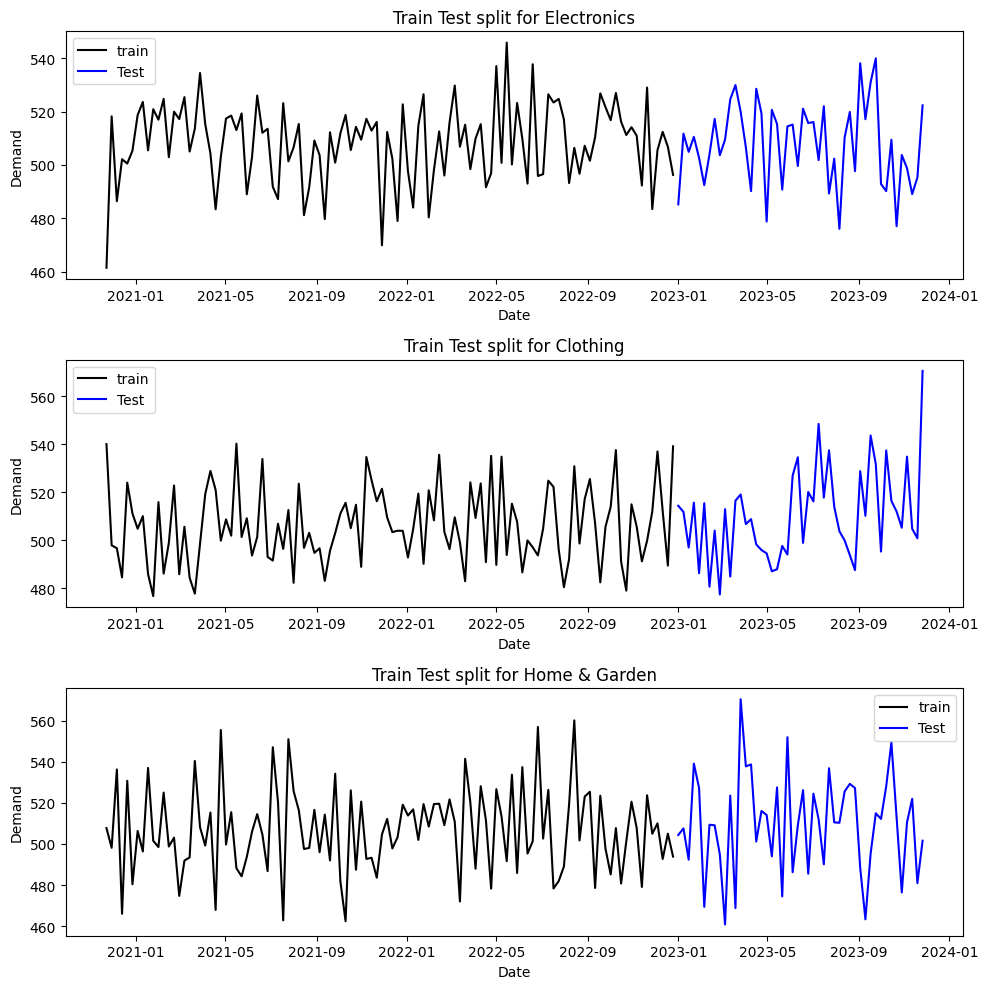

In [8]:
# Convert the data into the correct type
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
# Feature the product categories
product_categories = data["Product_Categories"].unique()

train_datas = {}
test_datas = {}

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

for i, product_category in enumerate(product_categories):
    #Subset the data for each product category
    category_data = data[data["Product_Categories"]==product_category]
    # Set the date as index of the data
    category_data.set_index(["Timestamp"], inplace=True)
    # Resample the data according to weekly timeframe
    category_data = category_data.resample('W').mean(numeric_only=True).ffill()
    # Split the data into train and test sets
    train = category_data.loc[category_data.index.year < 2023]["Demand"]
    test = category_data.loc[category_data.index.year >= 2023]["Demand"]
    # Add the datas per category to the whole dictionnaries
    train_datas[product_category] = train
    test_datas[product_category] = test

    ax[i].plot(train.index, train, color="black", label="train")
    ax[i].plot(test.index, test, color="blue", label="Test")
    ax[i].set_title(f"Train Test split for {product_category}")
    ax[i].set_xlabel("Date")
    ax[i].set_ylabel("Demand")
    ax[i].legend()
plt.tight_layout()
plt.show()

# 6. Demand forecasting

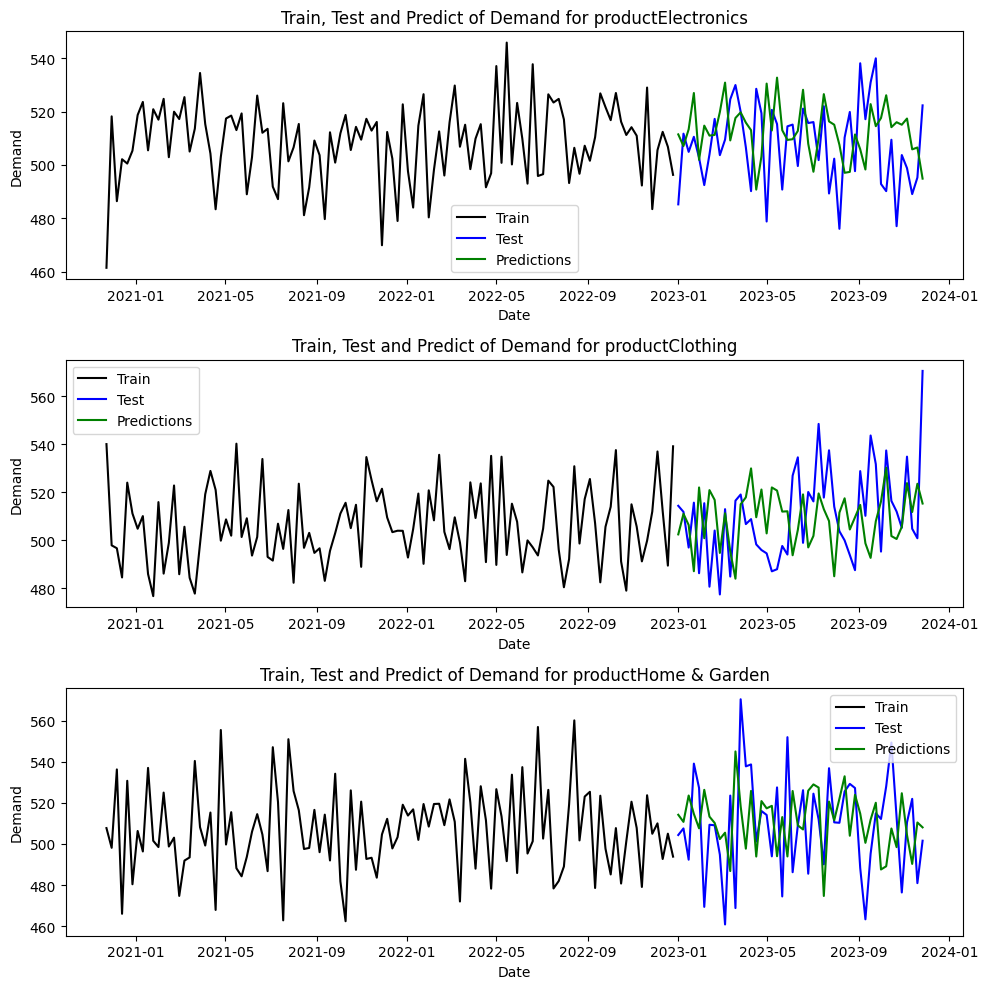

Average MSE: 24.068592938174607 Average MAE: 19.74999899358571 Average MAPE: 3.897001953265466


In [9]:
# Dict for the model for each product
es_model = {}

# define the metrics
mse, mae, mape = 0, 0, 0

# Define axis for ploting
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

for i, product_category in enumerate(product_categories):
    # Load the train and test datas
    train = train_datas[product_category]
    test = test_datas[product_category]

    # Define the model
    model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=52)
    # Train the model
    model_fit = model.fit()
    # Make predictions
    predict_demand = model_fit.forecast(steps=len(test))
    # Save the model
    es_model[product_category] = model_fit 
    # Compute the metrics for each product
    product_rmse = mean_squared_error(test, predict_demand, squared=False)
    product_mae = mean_absolute_error(test, predict_demand)
    product_mape = mean_absolute_percentage_error(test, predict_demand) * 100

    # Compute the whole metrics
    mse += product_rmse
    mae += product_mae
    mape += product_mape

    # Define the product axis
    product_ax = ax[i]
    # Plot the graphs
    product_ax.plot(train.index, train, color="black", label="Train")
    product_ax.plot(test.index, test, color="blue", label="Test")
    product_ax.plot(test.index, predict_demand, color="green", label="Predictions")
    product_ax.set_xlabel("Date")
    product_ax.set_ylabel("Demand")
    product_ax.set_title(f"Train, Test and Predict of Demand for product{product_category}")
    product_ax.legend()

plt.tight_layout()
plt.show()

print("Average MSE:", mse/3, "Average MAE:",mae/3, "Average MAPE:",mape/3)


# 7. Price optimization

Goal : 
* Optimize profit
* Market competitiveness

Write two functions : 
* profit_objective : compute the profit given a selling price, cost_prices and predicted_demand
* optimization function : optimie our profit by using the cost, the competitors_prices and the predicted_demand. We need to setup an initial selling price, a bound (for instance not less than the cost price and not greater than 90 % of the competitors prices)

they don't know the next demand, the next competitor (next week)
the have idea about past weeks and they just know the cost of the product they just bought

In [10]:
def profit_objective(selling_prices, cost_prices, predicted_demand):
    # Compute the revenue value
    revenue = selling_prices * predicted_demand
    # compute the total cost
    cost = cost_prices * predicted_demand
    # Compute the profit
    profit = revenue - cost

    return -profit

def find_optimal_price(cost_prices, competitors_prices, predicted_demand):
    # Define an initial price between the cost and competitiors
    initial_price = (cost_prices + competitors_prices) / 2
    # Define the bounds for the maximization problem
    bounds = [(cost_prices, competitors_prices*0.9)]
    # Compute the optimal price
    optimal_price = minimize(profit_objective, initial_price, args=(cost_prices, predicted_demand), bounds=bounds)

    return optimal_price.x[0]

split in two :

* `previous_data` : before 2023
* `next_data` : above 2023 cost and product we know (estimate demand, comp_prices, because we don't know them)

In [11]:
# Split the data into two : previous and future
previous_data = {}
future_data = {}

for product_category in product_categories:
    # Subset the data with respect to the product category
    category_data = data[data["Product_Categories"]==product_category]
    # Create the data from previous observations
    previous_data[product_category] = category_data.loc[category_data["Timestamp"].dt.year < 2023]
    # Create data for future observations
    future_data[product_category] = category_data.loc[category_data["Timestamp"].dt.year >= 2023]

- Cost of the new product for the new week
- Previous competitor prices per product_ID
- New week demand forecast per product ID


In [12]:
previous_data

{'Electronics':         Product_ID  Timestamp  Demand  Competitor_Prices  Inventory_Levels  \
 0             1005 2022-07-11     239               1331               646   
 4             1000 2021-12-23     361               1533               649   
 5             1005 2021-11-27     238               2331               645   
 7             1002 2022-06-04     653                973               757   
 10            1000 2020-12-17     502               1432               632   
 ...            ...        ...     ...                ...               ...   
 109753        1006 2022-11-13     633                493               794   
 109754        1001 2022-08-04     531               2987              1651   
 109755        1002 2021-11-05     534                117               613   
 109761        1005 2022-07-21     654               2448              1599   
 109762        1003 2022-07-27     531                381               627   
 
         Cost_Prices  Selling_Price

In [13]:
price_optimization_data = {}

for product_category in product_categories:
    # Compute the average previous competitor price per product
    avg_previous_competitor_price_per_product = previous_data[product_category].groupby("Product_ID").mean(numeric_only= True)["Competitor_Prices"]
    # Group the total previous data by product_id
    total_previous_demand_per_product_category = previous_data[product_category].groupby("Product_ID").sum(numeric_only=True)["Demand"]
    # Group the previous data by product_id
    previous_weekly_data = previous_data[product_category].groupby([previous_data[product_category]["Timestamp"].dt.to_period("W"), "Product_ID"]).mean(numeric_only=True)
    # Get the index of the previous data (here the weeks)
    previous_weekly_dates = previous_weekly_data.index.get_level_values(0).unique()
    # Group the future data by product_id
    future_weekly_data = future_data[product_category].groupby([future_data[product_category]["Timestamp"].dt.to_period("W"), "Product_ID"]).mean(numeric_only=True)
    # Get the index of the previous data (here the weeks)
    future_weekly_dates = future_weekly_data.index.get_level_values(0).unique()
    # Forecast the next demand of product
    future_weekly_total_demand_forecast = es_model[product_category].forecast(steps=len(test_datas[product_category])).values

    # Get over each week in the future
    for j, date in enumerate(future_weekly_dates):
        # Prepare data for usage
        date_str = str(date)
        if date_str not in price_optimization_data:
            price_optimization_data[date_str] = {}
        # Get the week price per product category
        week_cost_price_per_product = future_weekly_data.loc[date]["Cost_Prices"]
        # Get new week product ID
        products_ids = week_cost_price_per_product.index
        # Get the new week demand ratio based on previous demand /previous data
        week_product_demand_ratio = total_previous_demand_per_product_category.loc[products_ids] / np.sum(total_previous_demand_per_product_category.loc[products_ids])
        # Get an estimated demand per product for the week
        week_demand_per_product = week_product_demand_ratio*future_weekly_total_demand_forecast[j]
        # Add missing product in the final dataset
        week_demand_per_product = week_demand_per_product.reindex(products_ids, fill_value = 0)
        week_competitior_prices_per_product = avg_previous_competitor_price_per_product.reindex(products_ids, fill_value = 0)


        # Store the values in the price optimization dict
        price_optimization_data[date_str][product_category] = {"Weekly_cost_price_per_product": week_cost_price_per_product.values, 
                                                      "Avg_previous_competitor_price_per_product":week_competitior_prices_per_product.values,
                                                      "Week_demand_per_product": week_demand_per_product.values,
                                                      "Product_ids" : products_ids
        }


In [14]:
for week in price_optimization_data:
    for product_category in product_categories:

        cost_price = price_optimization_data[week][product_category]["Weekly_cost_price_per_product"]
        competitor_price = price_optimization_data[week][product_category]["Avg_previous_competitor_price_per_product"]
        predicted_demand = price_optimization_data[week][product_category]["Week_demand_per_product"]

        optimal_prices = []
        for csp, cpp, prd in zip(cost_price, competitor_price, predicted_demand):
            try:
                optimal_price = find_optimal_price(csp, cpp, prd)
                optimal_prices.append(optimal_price)
            except Exception:
                optimal_price= csp * 1,1 
                optimal_prices.append(optimal_price)

        price_optimization_data[week][product_category]["Optimal_Price"] = optimal_prices

In [15]:
product_week_data = {}

for week in price_optimization_data:
    product_week_data[week] = {}

    start_date, end_date = week.split("/")

    for product_category in product_categories:
        category_data = data[data["Product_Categories"]== product_category]

        week_data = category_data[category_data["Timestamp"].between(start_date, end_date)]
        
        optimal_prices_map = dict(
            zip(price_optimization_data[week][product_category]["Product_ids"], price_optimization_data[week][product_category]["Optimal_Price"]))

        optimal_demand_map = dict(
            zip(price_optimization_data[week][product_category]["Product_ids"], price_optimization_data[week][product_category]["Week_demand_per_product"]))
    
        week_data["Optimal_Price"] = week_data["Product_ID"].map(optimal_prices_map)
        week_data["Week_demand"] = week_data["Product_ID"].map(optimal_demand_map)

        product_week_data[week][product_category] = week_data


# Construct an application

Application : 
* Only knows the cost at the time
* only know the product ID
* Want to input the product ID, the cost price and the desired week to find the best prices

In [53]:
from ipywidgets import interact, IntSlider, Dropdown, FloatSlider, DatePicker, widgets
import datetime as dt

In [17]:
product_week_data.keys()

dict_keys(['2022-12-26/2023-01-01', '2023-01-02/2023-01-08', '2023-01-09/2023-01-15', '2023-01-16/2023-01-22', '2023-01-23/2023-01-29', '2023-01-30/2023-02-05', '2023-02-06/2023-02-12', '2023-02-13/2023-02-19', '2023-02-20/2023-02-26', '2023-02-27/2023-03-05', '2023-03-06/2023-03-12', '2023-03-13/2023-03-19', '2023-03-20/2023-03-26', '2023-03-27/2023-04-02', '2023-04-03/2023-04-09', '2023-04-10/2023-04-16', '2023-04-17/2023-04-23', '2023-04-24/2023-04-30', '2023-05-01/2023-05-07', '2023-05-08/2023-05-14', '2023-05-15/2023-05-21', '2023-05-22/2023-05-28', '2023-05-29/2023-06-04', '2023-06-05/2023-06-11', '2023-06-12/2023-06-18', '2023-06-19/2023-06-25', '2023-06-26/2023-07-02', '2023-07-03/2023-07-09', '2023-07-10/2023-07-16', '2023-07-17/2023-07-23', '2023-07-24/2023-07-30', '2023-07-31/2023-08-06', '2023-08-07/2023-08-13', '2023-08-14/2023-08-20', '2023-08-21/2023-08-27', '2023-08-28/2023-09-03', '2023-09-04/2023-09-10', '2023-09-11/2023-09-17', '2023-09-18/2023-09-24', '2023-09-25/20

In [18]:
id_per_categories = data.groupby("Product_Categories")["Product_ID"].unique()
id_per_categories

Product_Categories
Clothing         [1530, 1531, 1528, 1527, 1524, 1532, 1523, 153...
Electronics             [1005, 1000, 1002, 1006, 1001, 1004, 1003]
Home & Garden    [2328, 2325, 2323, 2329, 2321, 2322, 2326, 232...
Name: Product_ID, dtype: object

In [19]:
category_id_map = {
    "Clothing":id_per_categories[0].tolist(),
    "Electronics":id_per_categories[1].tolist(),
    "Home & Garden" : id_per_categories[2].tolist()
}

category_id_map

{'Clothing': [1530,
  1531,
  1528,
  1527,
  1524,
  1532,
  1523,
  1535,
  1526,
  1533,
  1534,
  1529,
  1525],
 'Electronics': [1005, 1000, 1002, 1006, 1001, 1004, 1003],
 'Home & Garden': [2328,
  2325,
  2323,
  2329,
  2321,
  2322,
  2326,
  2324,
  2331,
  2330,
  2327]}

In [42]:
def find_category(product_checked_id, set=category_id_map):
    for category in category_id_map.keys():
        if product_checked_id in category_id_map[category]:
            return category

def find_selling_price (date_checked, product_checked_id):
    for week in product_week_data.keys():
        if date_checked in week:
            category_checked = find_category(product_checked_id=product_checked_id)
            sub_group = product_week_data[week][category_checked]
            sub_group = sub_group[sub_group["Timestamp"]==date_checked]
            return round(sub_group[sub_group["Product_ID"]==product_checked_id]["Optimal_Price"].max()[0], 2)
            

In [43]:
find_selling_price("2023-01-01", 1004)

np.float64(1430.9)

In [23]:
find_category(1004)

'Electronics'

In [51]:
from IPython.display import display, HTML

In [85]:
def return_best_price(date, product_id):
    date = str(date)
    def find_category(product_checked_id, set=category_id_map):
        for category in category_id_map.keys():
            if product_checked_id in category_id_map[category]:
                return category

    def find_selling_price (date_checked, product_checked_id):
        for week in product_week_data.keys():
            days = pd.date_range(pd.to_datetime(week.split("/")[0]).date(), pd.to_datetime(week.split("/")[1]).date())
            if date_checked in days:
                category_checked = find_category(product_checked_id=product_checked_id)
                sub_group = product_week_data[week][category_checked]
                sub_group = sub_group[sub_group["Timestamp"]==date_checked]
                return round(sub_group[sub_group["Product_ID"]==product_checked_id]["Optimal_Price"].max(), 2)
    
    best_price = find_selling_price(date, product_checked_id=product_id)
    return (f"The optimal selling price with these details is: ${best_price}")


dates = [week.split("/") for week in product_week_data.keys()]
ids = data["Product_ID"].unique().tolist()


prices = FloatSlider(min = 0, max = 15_000, step = 100, value=0, description = "Product cost")
products = Dropdown(options = ids, value = ids[0], description = "Product ID")
date = DatePicker(min = pd.to_datetime("2022-12-26").date(), max = pd.to_datetime("2023-11-26").date(), value = pd.to_datetime("2022-12-26").date(), description = "Date")

interact_output = interact(return_best_price, date = date, product_id = products)

# Customize the style of the interact output
interact_output.widget.children[1].layout.width = '20%'
interact_output.widget.children[1].layout.margin = '15px'
interact_output.widget.children[2].margin = '10px'




interactive(children=(DatePicker(value=datetime.date(2022, 12, 26), description='Date', max=datetime.date(2023…